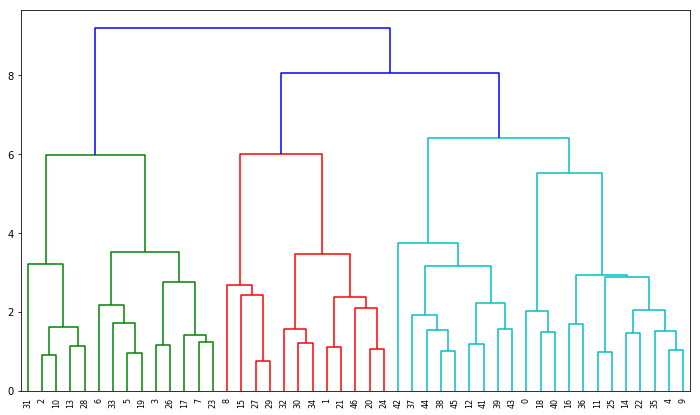

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_excel('data.xlsx', index_col=0) # Загрузка данных из excel  
normalized_df=(df-df.mean())/df.std()  # нормализуем данные
X = normalized_df[['X6','X8','X9','X14','X16']]  # выбираем нужные столбцы

""" МЕТОД УОРДА """
clustering = AgglomerativeClustering(linkage='ward',compute_full_tree=True, n_clusters=3)  # готовим объект кластеризации
model = clustering.fit(X) # запускаем кластеризацию и передаем таблицу X
labels = model.labels_  # получение массива классов
df['ward'] = labels  # создаем новый столбец с названием ward и записываем полученные результаты
#dist = pdist(normalized_df, 'euclidean')
Z = linkage(normalized_df, 'ward') # определяем метод (уорд)
plt.figure(figsize=(12, 7)) # определяем размеры дендрограммы
dn = dendrogram(Z) # выводим дендрограмму
plt.show()

#print(df['ward'].to_string(index=False, header=False)) # выводим столбец ward


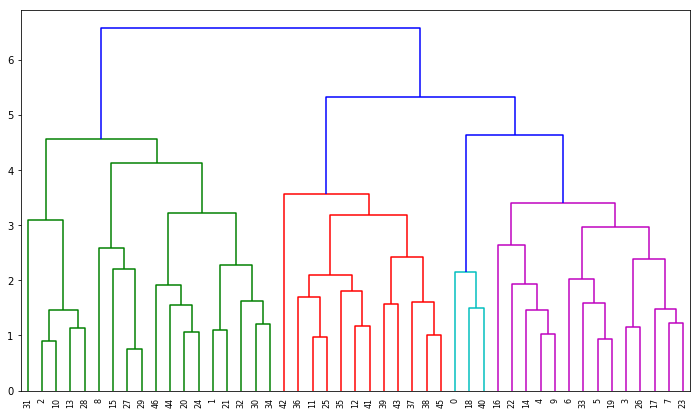

In [57]:
""" МЕТОД ПОЛНОЙ СВЯЗИ"""
clustering = AgglomerativeClustering(linkage='complete',compute_full_tree=True, n_clusters=3)
model = clustering.fit(X)  # запускаем кластеризацию и передаем X
labels = model.labels_  # Получение массива классов 
df['complete'] = labels # создаем новый столбец с названием compleate и записываем полученные результаты

Z = linkage(normalized_df, 'complete') # определяем метод 
plt.figure(figsize=(12, 7)) # определяем размеры дендрограммы
dn = dendrogram(Z) # выводим дендрограмму
plt.show()

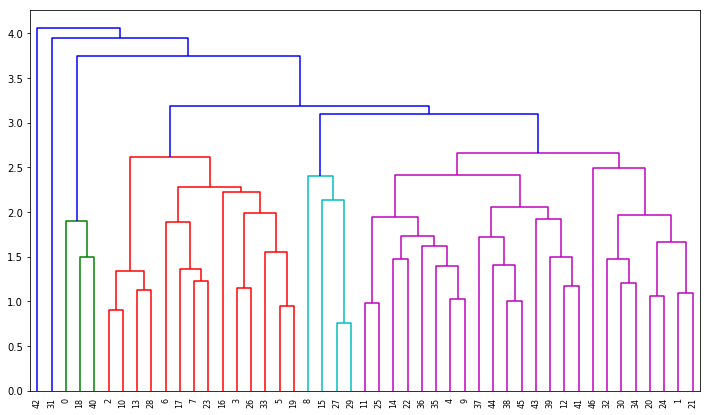

In [58]:
""" МЕТОД Попарного среднего"""
clustering = AgglomerativeClustering(linkage='average',compute_full_tree=True, n_clusters=3)
model = clustering.fit(X)  # запускаем кластеризацию и передаем X
labels = model.labels_  # Получение массива классов 
df['average'] = labels # создаем новый столбец с названием compleate и записываем полученные результаты

Z = linkage(normalized_df, 'average') # определяем метод 
plt.figure(figsize=(12, 7)) # определяем размеры дендрограммы
dn = dendrogram(Z) # выводим дендрограмму
plt.show()

In [59]:
""" KMEANS"""
kmeans = KMeans(n_clusters=3) # Метод K-means выбираем кол-во кластеров
predict = kmeans.fit_predict(X) # Запускаем k-means и передаем входную таблицу
df['kmeans'] = predict  # создаем новый столбец с названием k-means и записываем полученные результаты
#print(df['kmeans'].to_string(index=False, header=False)) # выводим столбец kmeans


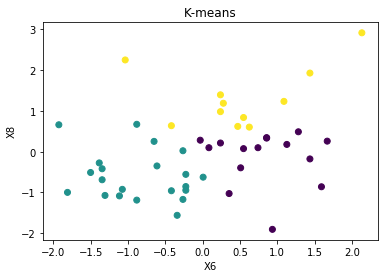

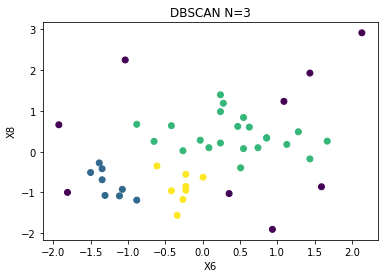

In [60]:
""" Выбираем две компоненты чтобы показать график разбиения"""
# KMEANS
X = normalized_df[['X6','X8']]  # выбираем нужные столбцы
kmeans = KMeans(n_clusters=3) # Метод K-means выбираем кол-во кластеров
predict = kmeans.fit_predict(X) # Запускаем k-means и передаем входную таблицу
#df['kmeans'] = predict  # создаем новый столбец с названием k-means и записываем полученные результаты
#print(df['kmeans'].to_string(index=False, header=False)) # выводим столбец kmeans
plt.scatter(X['X6'], X['X8'], c=predict) 
plt.title("K-means") # название графика
plt.xlabel('X6') # название оси x
plt.ylabel('X8') # название оси y
plt.show() # вывод графика

# DBSCAN
db = DBSCAN(eps=0.5, min_samples=4).fit(X)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#df['DBSCAN'] = labels # создаем новый столбец с названием DBSCAN и записываем полученные результаты
#print(df['DBSCAN'].to_string(index=False, header=False)) # выводим столбец DBSCAN
plt.scatter(X['X6'], X['X8'], c=labels)
plt.title("DBSCAN N={}".format(n_clusters_)) # название графика
plt.xlabel('X6') # название оси x
plt.ylabel('X8') # название оси y
plt.show() # вывод графика


In [61]:
df

,X6,X8,X9,X14,X16,ward,complete,average,kmeans
Наименование,,,,,,,,,
Абдулинский,20.8,93.1,245.4,780.4,58.5,0,0,0,0
Адамовский,12.4,23.4,144.0,942.6,93.0,2,1,0,1
Акбулакский,11.9,23.6,175.0,625.8,39.8,1,1,0,1
Александровский,13.6,46.7,233.6,614.3,55.0,1,0,0,0
Асекеевский,17.2,44.0,184.9,905.5,63.5,0,0,0,2
Беляевский,14.7,25.8,211.7,733.3,50.8,1,0,0,1
Бугурусланский,19.4,27.3,213.5,626.1,62.0,1,0,0,0
Бузулукский,18.6,50.8,200.2,562.1,43.4,1,0,0,0
Гайский,17.7,9.1,145.9,918.9,75.3,2,1,0,1
